@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/zBqnWfTwCgc

# Juego: "Piedra, Papel o Tijera"
# Clasificación de Imágenes para Principiantes
# Red Neuronal Convolucional
A las redes neuronales convolucionales comúnmente se les conoce por el término CNNs por sus siglas en inglés (Convolutional Neural Networks).

Antes de ver/ejecutar esta Libreta, se recomienda ver el video sobre clasificación de imágenes con un perceptrón multicapa: https://youtu.be/uM4u7P2xkO8


### Librerías y versión de TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.15.0


### Descargar Imágenes del Repositorio de GitHub de Código Máquina

Los imágenes que se encuentran en el repositorio de Código Máquina son las mismas imágenes provistas por Julien de la Bruère-Terreault.

**Referencia**

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [ ]:
# Clonar repositorio de Código Máquina
!git clone https://github.com/CodigoMaquina/code/

# Descomprimir conjunto de datos
!unzip /content/code/piedra_papel_tijera_originales.zip

# Ruta donde están almacenadas las imágenes
ruta = "/content/piedra_papel_tijera_originales"

Cloning into 'code'...
remote: Enumerating objects: 806, done.
remote: Counting objects: 100% (468/468), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 806 (delta 131), reused 176 (delta 80), pack-reused 338
Receiving objects: 100% (806/806), 12.60 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (289/289), done.
Archive:  /content/code/piedra_papel_tijera_originales.zip
   creating: piedra_papel_tijera_originales/
   creating: piedra_papel_tijera_originales/paper/
  inflating: piedra_papel_tijera_originales/paper/0.png  
  inflating: piedra_papel_tijera_originales/paper/1.png  
  inflating: piedra_papel_tijera_originales/paper/10.png  
  inflating: piedra_papel_tijera_originales/paper/100.png  
  inflating: piedra_papel_tijera_originales/paper/101.png  
 extracting: piedra_papel_tijera_originales/paper/102.png  
  inflating: piedra_papel_tijera_originales/paper/103.png  
  inflating: piedra_papel_tijera_originales/paper/104.png  
  inflating: piedra_papel_tijera

### Cargar Imágenes de *Piedras*, *Papeles*, y *Tijeras*
Se asume que las imágenes están agrupadas por clase y que se encuentran en carpetas diferentes: *rock*, *paper*,  *scissors*. Además, cada carpeta tiene imágenes cuyo nombre va de 0.png a 699.png indicando el número de imagen.

In [ ]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper" : 0, "rock" : 1, "scissors" : 2}

# Número de imágenes de cada clase
num_img_clase = 700

# Imágenes de Entrenamiento de cada clase: 490
# 70% de las imágenes de una clase = 490 imágenes
num_entrena = round(num_img_clase * 0.70)

# Imágenes de Prueba de cada clase: 210
# 30% de las imágenes de una clase = 210 imágenes
num_prueba = round(num_img_clase * 0.30)

# Creación de arreglos para almacenar datos de Entrenamiento para las 3 clases
# Las imágenes son de 300 (ancho) x 200 (alto) y tienen 3 canales
imagenes_entrena = np.empty((num_entrena * len(clases), 200, 300, 3), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

# Creación de arreglos para almacenar datos de Prueba para las 3 clases
imagenes_prueba = np.empty((num_prueba * len(clases), 200, 300, 3), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Cargar datos de Entrenamiento: imágenes de la 0 a la 489
for i in range(num_entrena):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_entrena
    imagenes_entrena[indice_instancia] = np.array(imagen)
    clases_entrena[indice_instancia] = clases[clase]

# Cargar datos de Prueba: imágenes de la 490 a la 699
for i in range(num_entrena, num_img_clase):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_prueba - num_entrena
    imagenes_prueba[indice_instancia] = np.array(imagen)
    clases_prueba[indice_instancia] = clases[clase]

# Visualización de algunas imágenes

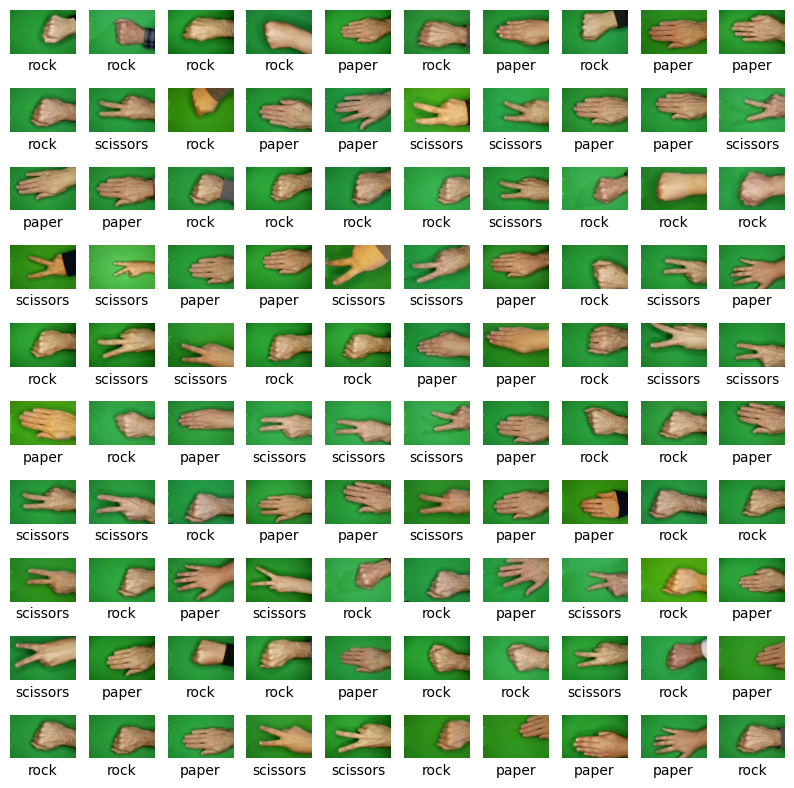

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Selección aleatoria de una imagen
    indice = random.randint(0, num_entrena*len(clases) - 1)
    plt.imshow(imagenes_entrena[indice], cmap="gray")
    plt.xlabel(descripcion[clases_entrena[indice]])
    plt.grid(False)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Visualización de una imagen arbitraria en tamaño grande

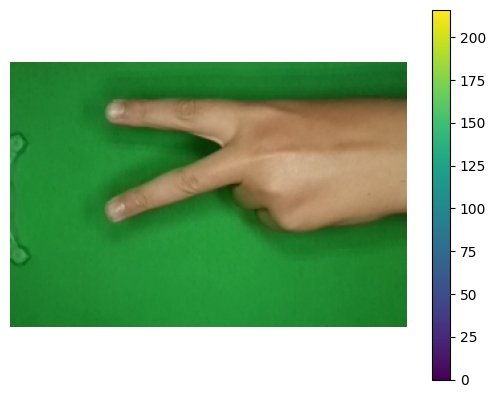

In [ ]:
plt.figure()
plt.imshow(imagenes_prueba[502])
plt.colorbar()
plt.grid(False)
plt.box(False)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]

In [ ]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Creación del modelo de la Red Neuronal Convolucional (CNN)

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

# Cofigurar el Modelo para Entrenamiento

In [ ]:
modelo.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

# Entrena el Modelo (es decir, la Red Neuronal Convolucional)

In [ ]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=10)

Epoch 1/10
46/46 [==============================] - 147s 3s/step - loss: 1.0284 - accuracy: 0.5007
Epoch 2/10
46/46 [==============================] - 137s 3s/step - loss: 0.7516 - accuracy: 0.7204
Epoch 3/10
46/46 [==============================] - 137s 3s/step - loss: 0.5718 - accuracy: 0.7980
Epoch 4/10
46/46 [==============================] - 144s 3s/step - loss: 0.5283 - accuracy: 0.8082
Epoch 5/10
46/46 [==============================] - 143s 3s/step - loss: 0.4285 - accuracy: 0.8537
Epoch 6/10
46/46 [==============================] - 138s 3s/step - loss: 0.3818 - accuracy: 0.8701
Epoch 7/10
46/46 [==============================] - 138s 3s/step - loss: 0.3188 - accuracy: 0.8959
Epoch 8/10
46/46 [==============================] - 145s 3s/step - loss: 0.2641 - accuracy: 0.9109
Epoch 9/10
46/46 [==============================] - 139s 3s/step - loss: 0.2080 - accuracy: 0.9313
Epoch 10/10
46/46 [==============================] - 146s 3s/step - loss: 0.2042 - accuracy: 0.9395


# Evalúa el modelo (porcentaje de aciertos con datos de prueba)

In [ ]:
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba):", exactitud)

20/20 [==============================] - 17s 862ms/step - loss: 0.1924 - accuracy: 0.9302
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba): 0.9301587343215942


# Clasifica las Imágenes de Prueba con la Red Convolucional

In [ ]:
predicciones = modelo.predict(imagenes_prueba)

20/20 [==============================] - 19s 955ms/step


# Salida de la Red Neuronal para cada Imagen de Prueba

In [ ]:
# Creación de arreglo para almacenar predicciones
clase_predicha = np.empty(num_prueba * len(clases), dtype = "uint8")

for instancia in range(num_prueba * len(clases)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])
  if clase_predicha[instancia] == clases_prueba[instancia]:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ACERTÓ")
  else:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ERRÓ")

Probabilidades: [0.9910149  0.00751871 0.00146645] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9927998e-01 5.6833308e-04 1.5158569e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9906183  0.00441287 0.00496886] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9832493e-01 1.2926370e-03 3.8238984e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9809492e-01 1.5732680e-03 3.3174208e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9781322e-01 1.4427457e-03 7.4406760e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.98189390e-01 1.71069987e-03 1.00002915e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9722421e-01 1.9786139e-03 7.9723436e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.7538996  0.19108017 0.05502013] Clase predic

# Matriz de Confusión: Resultado de Evaluación a Detalle

In [ ]:
# papel : 0     piedra : 1     tijera : 2
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)
print("Matriz de Confusión:\n", matriz.numpy())

Matriz de Confusión:
 [[186  11  13]
 [  7 197   6]
 [  4   3 203]]
